# Project: Wrangling and Analyze Data (WeRateDogs)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dg">Data Gathering</a></li>
<li><a href="#ad">Assessing Data</a></li>
<li><a href="#cda">Cleaning Data</a></li>
<li><a href="#sta">Storing Data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

WeRateDogs (@dog_rates) is a Twitter account that rates people's dogs with a humorous comment about the dog. This project entails the wrangling, analyzing and visualization processess conducted on the WeRateDogs dataset.

In [ ]:
!pip install tweepy

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
from bs4 import BeautifulSoup
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
%matplotlib inline

<a id='dg'></a>
## Data Gathering
Gathering all the dataset from the different sources  

1. Downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive_data = pd.read_csv('twitter-archive-enhanced.csv')
archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Used the Requests library to download the tweet image prediction (image_predictions.tsv). The file was hosted on Udacity's servers and it was provided by the instructor URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv  

In [3]:
# download content on image prediction

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url, verify= False)

C:\Users\fcp\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'd17h27t6h515a5.cloudfront.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [4]:
# checking if the request was performed 
response.status_code

200

In [5]:
response.encoding

'utf-8'

In [6]:
# making a directory to store the dowloaded content tsv files 
folder_name = 'image_prediction'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file: 
    file.write(response.content)

In [7]:
prediction = pd.read_csv('image-predictions.tsv', '\t')
prediction.head()

C:\Users\fcp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Used the Tweepy library to query additional data via the Twitter API (tweet_json.txt)  

> __NOTE:__ In accessing the twitter API, I used the code sent by the udacity instructor

In [8]:
consumer_key = '*****'
consumer_secret = '*****'
access_token = '*****'
access_secret = '*****'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_data.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [10]:
# saving the json file as csv

tweet_json = pd.read_json('tweet-json.txt', lines = True)
tweet_json.to_csv('tweets.csv', index=False)

In [11]:
tweet = pd.read_csv('tweets.csv')
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<a id='ad'></a>
## Assessing Data
In this section, I assessed the gathered data visually and programmatically for both __quality__ and __tidiness__.  

The data was assessed for quality by ensuring that it's contents met the following criterias: accuracy, consistency, completeness, validity, uniqueness and timeliness. Also only the original tweets (no retweets) that have images is to be retained.  

The data was assessed for tidiness by ensuring its structure met the following criterias: every column is a variable, every row is an observation and every cell is a single value.  

In [12]:
archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
tweet

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [15]:
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   int64  
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     float64
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     f

In [18]:
archive_data.duplicated().sum()

0

In [19]:
prediction.duplicated().sum()

0

In [20]:
tweet.duplicated().sum()

0

In [21]:
sum(archive_data.rating_numerator.isnull())

0

In [22]:
sum(archive_data.rating_denominator.isnull())

0

In [23]:
sum(tweet.retweet_count.isnull())

0

In [24]:
sum(tweet.favorite_count.isnull())

0

In [25]:
archive_data.name.value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

In [26]:
archive_data.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [27]:
list(archive_data.source)

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com/download/ipho

In [28]:
archive_data[archive_data.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


### Quality issues
#### `archive_data` table
1. observations for retweet and reply present in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id sholud be avoided,
> * observation for retweet: 181
> * observation for reply: 78
2. erroneous datatype (timestamp, tweet_id)
3. rating_numerator and rating_denominator have extremely large values and are inconsistent
4. name feature has invlaid records e.g a, an, the, bo
5. source feature has url included in its values
6. uninterested columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id.

#### `prediction` table
7. p1, p2 and p3 columns in the `prediction` table should be placed in a single column
8. some breed name starts with upper case and others lower case

#### `tweet` table
9. erroneous datatype (created_at)

### Tidiness issues
1. column headers in `archive_data` table are values not variable names (doggo,floofer,pupper,puppo)
2. favorite_count, retweet_count and `prediction` table should be part of the `archive_data` table

<a id='cda'></a>
## Cleaning Data

Copies of all gathered dataset was created  
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
archive_data_clean = archive_data.copy()
prediction_clean = prediction.copy()
tweet_clean = tweet.copy()

###  Tidiness

According to statistician, Hadley Wickham, the pioneer of tidy data; it's generally best to clean structural issues first, like tidiness, and then clean content issues, like quality. He gave two reasons of support.

- Tidy datasets are easy to manipulate
- Tidy datasets with data quality issues are almost always easier to clean than untidy datasets with the same issues

#### column headers in `archive_data` table are values not variable names (doggo,floofer,pupper,puppo)

#### Define:
Convert the 'doggo', 'floofer', 'pupper' and 'puppo' columns into a single column withe the variable name 'stage'

#### Code

In [30]:
archive_data_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [31]:
# create a new column 'stage'
archive_data_clean['stage'] = ''
archive_data_clean['stage'] = archive_data_clean.doggo + archive_data_clean.floofer + archive_data_clean.pupper + archive_data_clean.puppo
archive_data_clean['stage'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [32]:
# replace the none values
archive_data_clean['stage'] = archive_data_clean['stage'].apply(lambda x: x.replace('None',''))
archive_data_clean['stage'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [33]:
archive_data_clean['stage'] = archive_data_clean['stage'].apply(lambda x: x.replace('doggopupper', 'doggo, pupper'))
archive_data_clean['stage'] = archive_data_clean['stage'].apply(lambda x: x.replace('doggopuppo', 'doggo, puppo'))
archive_data_clean['stage'] = archive_data_clean['stage'].apply(lambda x: x.replace('doggofloofer', 'doggo, floofer'))

In [34]:
archive_data_clean.drop(columns=['doggo', 'pupper', 'floofer', 'puppo'], inplace=True)

#### Test

In [35]:
archive_data_clean.stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [36]:
list(archive_data_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

#### favorite_count, retweet_count and `prediction` table should be part of the `archive_data` table

#### Define:
Merge the favorite_count, retweet_count and the `prediction` table together with the `archive_data` table

#### Code

In [37]:
# select the id, retweet_count and favorite column in the tweet table
tweet_clean = tweet_clean[['id','retweet_count','favorite_count']]

In [38]:
# rename the id column
tweet_clean.rename(columns= {"id":"tweet_id"},inplace=True)

In [39]:
# meger the tables together
archive_data_clean = pd.merge(archive_data_clean, tweet_clean, on=['tweet_id'], how='inner')
archive_data_clean = pd.merge(archive_data_clean, prediction_clean, on=['tweet_id'], how='inner')

#### Test

In [40]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  stage                       2073 

### Quality

#### observations for retweet and reply present in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id sholud be avoided

#### Define
delete the observations in `archive_data_clean` for reply and retweet

#### Code

In [53]:
# dropping the retweet observation
archive_data_clean = archive_data_clean[archive_data_clean.retweeted_status_id.isnull()]
archive_data_clean = archive_data_clean[archive_data_clean.retweeted_status_user_id.isnull()]
archive_data_clean = archive_data_clean[archive_data_clean.retweeted_status_timestamp.isnull()]

In [55]:
# dropping the reply observation
archive_data_clean = archive_data_clean[archive_data_clean.in_reply_to_status_id.isnull()]
archive_data_clean = archive_data_clean[archive_data_clean.in_reply_to_user_id .isnull()]

#### Test

In [57]:
# check if retweet observations are dropped
assert archive_data_clean.retweeted_status_id.isnull().all() == True

In [58]:
# check if reply observations are dropped
assert archive_data_clean.in_reply_to_status_id.isnull().all() == True

#### erroneous datatype (timestamp, tweet_id)

#### Define
convert the datatype to datetime for only timestamp since the interest is on tweets and not retweets

#### Code

In [59]:
archive_data_clean['timestamp'] = pd.to_datetime(archive_data_clean['timestamp'])
archive_data_clean['tweet_id'] = archive_data_clean['tweet_id'].astype(str)

#### Test

In [60]:
print(archive_data_clean['timestamp'].dtype)
print(archive_data_clean['tweet_id'].dtype)

datetime64[ns, UTC]
object


#### rating_numerator and rating_denominator have extremely large values and are inconsistent

#### Define
Perform feature engineering (where: rating = rating_numerator / rating_denominator)

#### Code

In [61]:
# create column for rating
archive_data_clean['rating'] = archive_data_clean['rating_numerator']/archive_data_clean['rating_denominator']

#### Test

In [62]:
# check for feature engineering
assert 'rating' in archive_data_clean.columns

In [63]:
# check for feature engineering creation
archive_data_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
983,719332531645071360,NaN,NaN,2016-04-11 01:13:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippa. She managed to start the car bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719332531...,...,Dandie_Dinmont,0.224415,True,miniature_poodle,0.204882,True,Norfolk_terrier,0.090633,True,1.1
1283,690597161306841088,NaN,NaN,2016-01-22 18:09:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690597161...,...,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False,1.1


#### name feature has invlaid records e.g a, an, the, bo

#### Define
Replace invalid names starting with lower case (a, an, the, etc.) with None

#### Code

In [64]:
# replace invalid names: a, an, all, the etc.
archive_data_clean.name = archive_data_clean.name.apply(lambda x: 'None' if x[0].islower() else x)

#### Test

In [65]:
# check for the pressence of lower case
assert archive_data_clean.name.apply(lambda x: x[0].isupper()).all()

#### source feature has url included in its values

#### Define
Extract the string varibles from the source column

#### Code

In [66]:
archive_data_clean['source'] = archive_data_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [67]:
archive_data_clean.source.values

array(['Twitter for iPhone', 'Twitter for iPhone', 'Twitter for iPhone',
       ..., 'Twitter for iPhone', 'Twitter for iPhone',
       'Twitter for iPhone'], dtype=object)

#### uninterested columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id.

#### Define
Drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id

#### Code

In [72]:
# drop uninterested features
drop_column = ['retweeted_status_id', 'retweeted_status_user_id', 
               'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id']
archive_data_clean.drop(drop_column, axis=1, inplace=True)

#### Test

In [73]:
# check if uninterested features are present
archive_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'rating'],
      dtype='object')

#### p1, p2 and p3 columns in the `prediction` table should be placed in a single column

#### Define
Select one from the three predictions data with a `highest confidence` and `TRUE`

#### Code

In [79]:
# order of confidence value is sorted, p1_conf > p2_conf > p3_conf
# create an empty list to save the choices for each row in the dataset
breed_name = []
confidence = []

# function to iteerate through the prediction_clean dataframe to find the highest confidence and true
def breed_determiner(ram):
    if ram.p1_dog == True:
        breed_name.append(ram.p1)
        confidence.append(ram.p1_conf)
    elif ram.p2_dog == True:
        breed_name.append(ram.p2)
        confidence.append(ram.p2_conf)
    elif ram.p3_dog == True:
        breed_name.append(ram.p3)
        confidence.append(ram.p3_conf)
    else:
        breed_name.append('Unpredicted')
        confidence.append(0)
    
# call function
archive_data_clean.apply(breed_determiner, axis=1) # apply by column

# add list to the dataframe
archive_data_clean['breed_name'] = breed_name
archive_data_clean['confidence'] = confidence

In [80]:
# drop the excess columns
column_drop = ['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']

archive_data_clean.drop(column_drop, axis=1, inplace=True)

#### Test

In [84]:
# check if excess columns dropped
assert archive_data_clean.columns.any() not in column_drop

In [85]:
# check for breed_name and confidence values
archive_data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,rating,breed_name,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.3,Unpredicted,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.3,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.2,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.3,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,1.2,basset,0.555712


#### some breed name starts with upper case and others lower case

#### Define
replace '_' with ' ' in `breed_name`  
convert the starting letter in `breed_name`from lower case to upper case

#### Code

In [88]:
# replace '_' with empty space
archive_data_clean.breed_name = archive_data_clean.breed_name.str.replace('_',' ')

In [94]:
# convert each word to start with upper case
archive_data_clean.breed_name = archive_data_clean.breed_name.apply(lambda x: x.title())

In [104]:
# check for brred_names with '-'
archive_data_clean[archive_data_clean.breed_name.str.contains('-')].breed_name.unique()

array(['German Short-Haired Pointer', 'Flat-Coated Retriever',
       'Black-And-Tan Coonhound', 'Soft-Coated Wheaten Terrier',
       'Curly-Coated Retriever', 'Wire-Haired Fox Terrier', 'Shih-Tzu'],
      dtype=object)

In [105]:
# replace '-' with ' ' in unique breed_name
conditions = [archive_data_clean.breed_name == 'German Short-Haired Pointer',
             archive_data_clean.breed_name == 'Flat-Coated Retriever',
             archive_data_clean.breed_name == 'Black-And-Tan Coonhound',
             archive_data_clean.breed_name == 'Soft-Coated Wheaten Terrier',
             archive_data_clean.breed_name == 'Curly-Coated Retriever',
             archive_data_clean.breed_name == 'Wire-Haired Fox Terrier',
             archive_data_clean.breed_name == 'Shih-Tzu']
choices = ['German Short Haired Pointer',
          'Flat Coated Retriever',
          'Black and Tan Coonhound',
          'Soft Coated Wheaten Terrier',
          'Curly Coated Retriever',
          'Wire Haired Fox Terrier',
          'Shih-Tzu']

archive_data_clean.breed_name = np.select(conditions, choices, default=archive_data_clean.breed_name)

#### Test

In [108]:
# check for replacement
archive_data_clean.breed_name.unique()

array(['Unpredicted', 'Chihuahua', 'Labrador Retriever', 'Basset',
       'Chesapeake Bay Retriever', 'Appenzeller', 'Pomeranian',
       'Irish Terrier', 'Pembroke', 'Samoyed', 'French Bulldog',
       'Golden Retriever', 'Whippet', 'Siberian Husky',
       'Mexican Hairless', 'Kuvasz', 'Pug', 'Blenheim Spaniel',
       'Malamute', 'Italian Greyhound', 'Chow', 'German Shepherd',
       'Doberman', 'Eskimo Dog', 'Weimaraner', 'Saluki',
       'Miniature Pinscher', 'German Short Haired Pointer',
       'English Springer', 'Vizsla', 'Bloodhound', 'Bernese Mountain Dog',
       'West Highland White Terrier', 'Cocker Spaniel',
       'Flat Coated Retriever', 'Cardigan', 'Newfoundland',
       'Shetland Sheepdog', 'Komondor', 'Kelpie',
       'Greater Swiss Mountain Dog', 'Border Collie', 'Bull Mastiff',
       'Staffordshire Bullterrier', 'Australian Terrier',
       'Bouvier Des Flandres', 'Bedlington Terrier', 'Boston Bull',
       'Black and Tan Coonhound', 'Great Dane', 'Standard Poodl

<a id='sta'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [109]:
# storing the gathered, assessed and cleaned data to a csv file
archive_data_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis
Analysis and visualization of the wrangled data to uncover insights

In [111]:
rate_dogs = archive_data_clean.copy()
prediction_data = prediction_clean.copy()

In [112]:
rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   stage               1971 non-null   object             
 9   retweet_count       1971 non-null   int64              
 10  favorite_count      1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  rating              1971 non-null 

In [113]:
rate_dogs.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,rating,confidence
count,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,12.223237,10.477423,2784.449518,8949.106545,1.169499,0.466219
std,41.634034,6.853275,4697.662893,12267.799790,4.090634,0.339608
min,0.000000,2.000000,16.000000,81.000000,0.000000,0.000000
25%,10.000000,10.000000,628.500000,1997.000000,1.000000,0.140969
50%,11.000000,10.000000,1367.000000,4147.000000,1.100000,0.461076
75%,12.000000,10.000000,3239.000000,11402.500000,1.200000,0.777087
max,1776.000000,170.000000,79515.000000,132810.000000,177.600000,0.999956


### Insights:
1. What is the most used source for tweeting on WeRateDogs?

2. What is the impact of rating on retweet and favorite count?

3. What is the relationship between retweet and favorite count?

4. What is top 20 most tweeted dog breeds?

5. Which dog breed has the highest favorite and retweet count on average?

##### What is the most used source for tweeting on WeRateDogs

In [114]:
rate_dogs['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

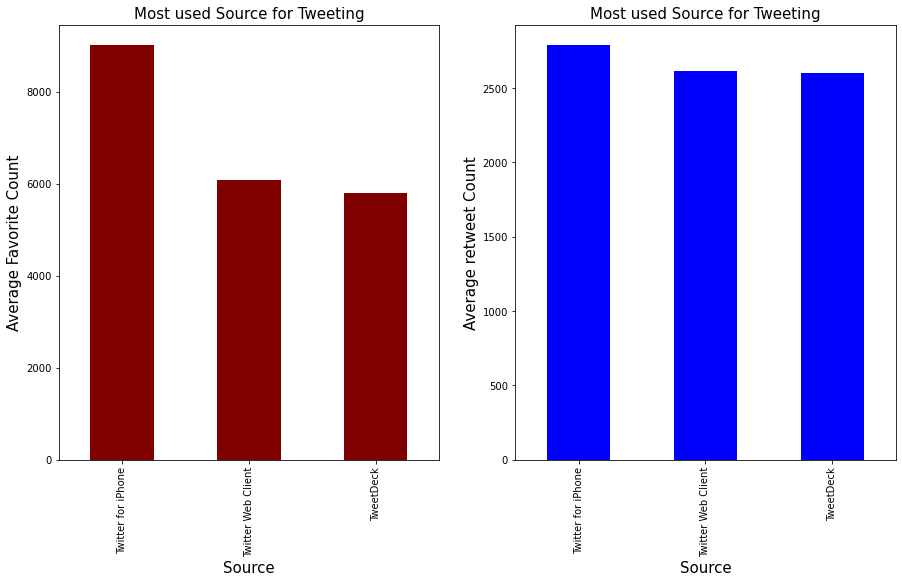

In [115]:
# plot most used source for favorite
plt.subplot(1,2,1)
rate_dogs.groupby('source').favorite_count.mean().sort_values(ascending=False).plot(kind='bar',color='maroon',figsize=(15,8))
plt.title('Most used Source for Tweeting',fontsize=15)
plt.xlabel('Source', fontsize=15)
plt.ylabel('Average Favorite Count',fontsize=15)
plt.savefig('most used source favorite Count.jpg', bbox_inches='tight', dpi=300);

# plot most used source for retweet
plt.subplot(1,2,2)
rate_dogs.groupby('source').retweet_count.mean().sort_values(ascending=False).plot(kind='bar',color='blue', figsize=(15,8))
plt.title('Most used Source for Tweeting',fontsize=15)
plt.xlabel('Source', fontsize=15)
plt.ylabel('Average retweet Count',fontsize=15)
plt.savefig('Most used source retweet Count.jpg', bbox_inches='tight', dpi=300);

The most used `source` for tweeting on WeRateDogs is _twitter for iphone_ 

#### What is the impact of rating on retweet and favorite count?

In [116]:
# correlation between rating, retweet and favorite
correl = rate_dogs[['rating','retweet_count','favorite_count']].corr()
correl

,rating,retweet_count,favorite_count
rating,1.000000,0.018300,0.015812
retweet_count,0.018300,1.000000,0.913014
favorite_count,0.015812,0.913014,1.000000


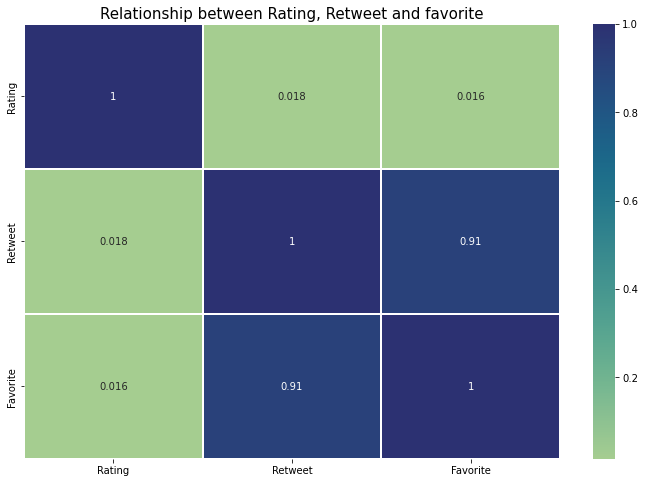

In [117]:
# heatmap visuals
plt.figure(figsize=(12,8))
labels = ['Rating','Retweet','Favorite']
sns.heatmap(correl, xticklabels=labels, yticklabels=labels, annot=True, linewidths=.2, cmap='crest')
plt.title('Relationship between Rating, Retweet and favorite', fontsize=15, pad=5);
plt.savefig('crl rating, retweet & fav.jpg', bbox_inches='tight', dpi=300);

Rating is less likely to impact retweet and favorite count.

#### What is the relationship between retweet and favorite count?

In [118]:
# correlation between rating, retweet and favorite
rate_dogs[['retweet_count','favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.913014
favorite_count,0.913014,1.000000


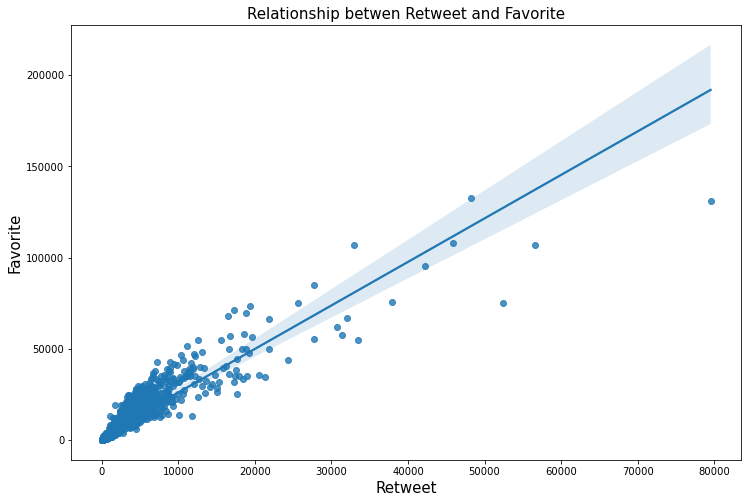

In [119]:
plt.figure(figsize=(12,8))
sns.regplot(x=rate_dogs.retweet_count, y=rate_dogs.favorite_count)
plt.title('Relationship betwen Retweet and Favorite', fontsize=15)
plt.xlabel('Retweet', fontsize=15)
plt.ylabel('Favorite', fontsize=15);
plt.savefig('crl retweet & fav.jpg', bbox_inches='tight', dpi=300);

Retweet and favorite count are highly correlated

#### What is top 20 most tweeted dog breeds?

In [120]:
# consider the predicted observation for breed_name
dog_breed = rate_dogs.query('breed_name != "Unpredicted"')

In [121]:
# group by breed_name, count and sort by top 20
result = dog_breed.groupby('breed_name').count().rating.sort_values(ascending=True).nlargest(20)
result

breed_name
Golden Retriever            156
Labrador Retriever          106
Pembroke                     94
Chihuahua                    90
Pug                          62
Toy Poodle                   50
Chow                         48
Samoyed                      42
Pomeranian                   41
Malamute                     33
Chesapeake Bay Retriever     31
French Bulldog               31
Cocker Spaniel               30
Miniature Pinscher           24
Eskimo Dog                   22
Cardigan                     21
German Shepherd              21
Beagle                       20
Shih-Tzu                     20
Siberian Husky               20
Name: rating, dtype: int64

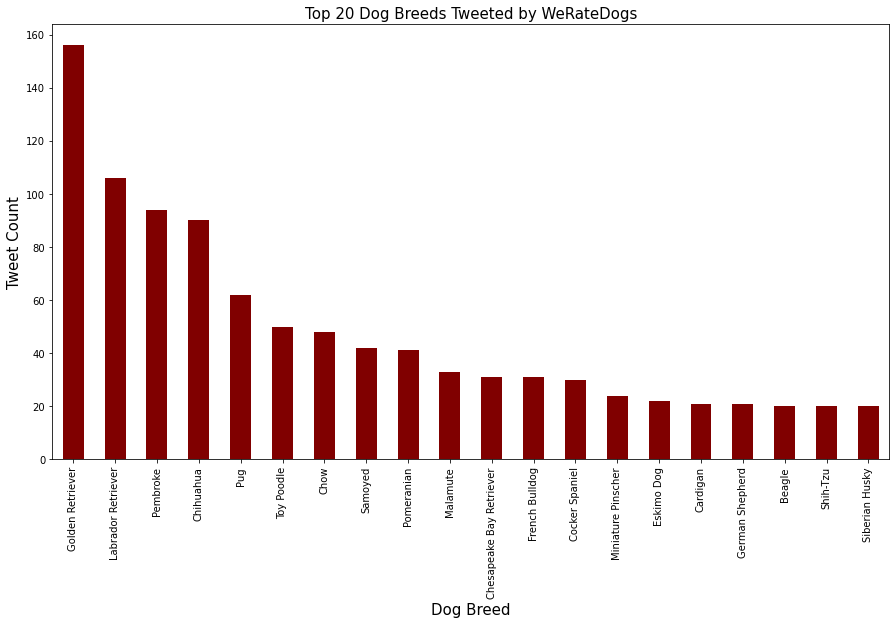

In [122]:
# plot result
plt.figure(figsize=(15,8))
result.plot(kind='bar', color='maroon')
plt.title('Top 20 Dog Breeds Tweeted by WeRateDogs',fontsize=15)
plt.ylabel('Tweet Count', fontsize=15)
plt.xlabel('Dog Breed',fontsize=15)
plt.savefig('dog breeds.jpg', bbox_inches='tight', dpi=300);

The noticable top dog breeds being tweeted are, Golden Retriver, Labrador Retriver, Pembroke, Chihuahua, Pug, Toy Poddle and Chow. Every other dog breeds gradually decreased in count.

#### Which dog breed has the highest favorite and retweet count on average?

In [123]:
# number of tweet of predicted dog breeds
dog_breed.shape[0]

1666

In [124]:
# number of unique dog breeds
dog_breed.breed_name.nunique()

113

In [125]:
# lowest tweet count for each dog breed
dog_breed.groupby('breed_name').count().rating.sort_values(ascending=True)

breed_name
Clumber                   1
Japanese Spaniel          1
Bouvier Des Flandres      1
Silky Terrier             1
Standard Schnauzer        1
                       ... 
Pug                      62
Chihuahua                90
Pembroke                 94
Labrador Retriever      106
Golden Retriever        156
Name: rating, Length: 113, dtype: int64

In [126]:
# there are 1750 tweets for 113 unique dog breeds
# set boundary for getting rid of outliers
boundary = dog_breed.shape[0]/dog_breed.breed_name.nunique()
boundary

14.743362831858407

In [127]:
# filtering the dog breeds
filter_dog_breeds = dog_breed.groupby('breed_name').count()
filter_dog_breeds = filter_dog_breeds[filter_dog_breeds.rating >= boundary]
filter_dog_breeds.tweet_id.unique() #filter_dog_breeds.tweet_id.nunique() = 19

array([ 16,  17,  20,  21,  31,  90,  48,  30,  22, 156,  15, 106,  33,
        19,  24,  94,  41,  62,  18,  42,  50], dtype=int64)

In [128]:
#
avg_retweet = round((dog_breed.groupby('breed_name').sum()/filter_dog_breeds).retweet_count.dropna().sort_values(ascending=False), 0)
avg_retweet

breed_name
French Bulldog                    5040.0
Cocker Spaniel                    4858.0
Samoyed                           4844.0
Great Pyrenees                    4534.0
Lakeland Terrier                  4253.0
Eskimo Dog                        4236.0
Labrador Retriever                3825.0
Cardigan                          3798.0
Golden Retriever                  3761.0
Malamute                          3107.0
Pembroke                          3104.0
Basset                            2915.0
Chihuahua                         2786.0
Chow                              2730.0
Pomeranian                        2728.0
German Shepherd                   2676.0
Chesapeake Bay Retriever          2636.0
Shetland Sheepdog                 2414.0
Staffordshire Bullterrier         2374.0
Miniature Pinscher                2340.0
American Staffordshire Terrier    2311.0
Toy Poodle                        2307.0
Rottweiler                        2287.0
Italian Greyhound                 2066.0
Pug  

In [129]:
dog_breed.groupby('breed_name').sum()

,rating_numerator,rating_denominator,retweet_count,favorite_count,rating,confidence
breed_name,,,,,,
Afghan Hound,29,30,17928,51980,2.9,1.301878
Airedale,118,120,16725,63370,11.8,7.005256
American Staffordshire Terrier,165,160,36973,150083,16.5,8.437746
Appenzeller,22,20,2916,14635,2.2,1.007331
Australian Terrier,23,20,6157,22255,2.3,0.615167
...,...,...,...,...,...,...
Welsh Springer Spaniel,38,40,4424,20224,3.8,1.399768
West Highland White Terrier,235,220,23592,96876,16.3,8.821965
Whippet,112,110,53243,142026,11.2,5.012110


In [130]:
filter_dog_breeds

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,rating,confidence
breed_name,,,,,,,,,,,,,,
American Staffordshire Terrier,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Basset,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Beagle,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Cardigan,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Chesapeake Bay Retriever,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Chihuahua,90,90,90,90,90,90,90,90,90,90,90,90,90,90
Chow,48,48,48,48,48,48,48,48,48,48,48,48,48,48
Cocker Spaniel,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Eskimo Dog,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [131]:
avg_favorite = round((dog_breed.groupby('breed_name').sum()/filter_dog_breeds).favorite_count.dropna().sort_values(ascending=False), 0)
avg_favorite

breed_name
French Bulldog                    18417.0
Samoyed                           13903.0
Cocker Spaniel                    13580.0
Cardigan                          12840.0
Golden Retriever                  12460.0
Great Pyrenees                    12456.0
Lakeland Terrier                  11953.0
Labrador Retriever                11937.0
Basset                            11762.0
Pembroke                          11051.0
Eskimo Dog                        10687.0
German Shepherd                   10356.0
Malamute                          10087.0
Chesapeake Bay Retriever           9750.0
Staffordshire Bullterrier          9488.0
American Staffordshire Terrier     9380.0
Chow                               9311.0
Shetland Sheepdog                  8586.0
Miniature Pinscher                 8295.0
Chihuahua                          8263.0
Italian Greyhound                  7712.0
Pomeranian                         7593.0
Rottweiler                         7399.0
Siberian Husky         

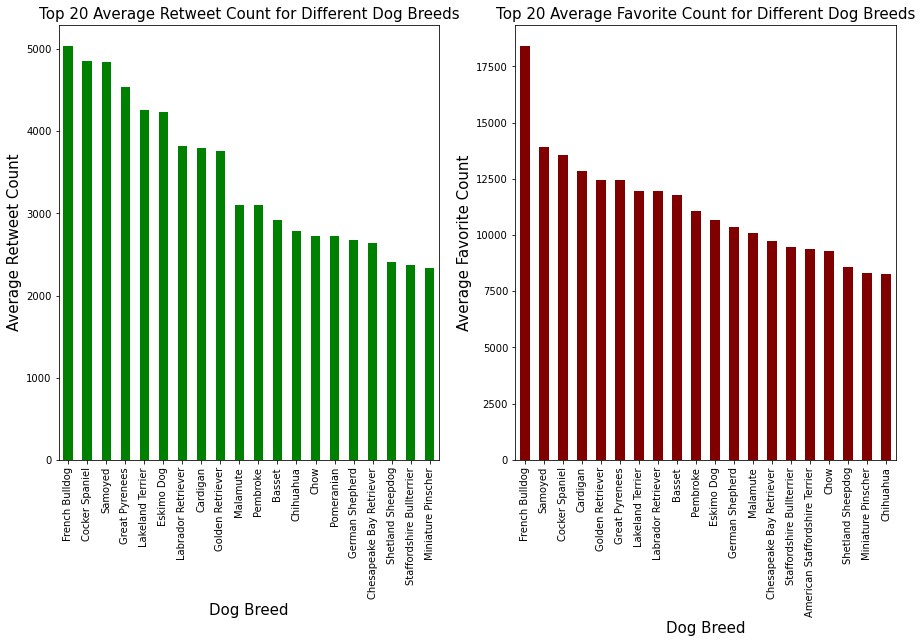

In [132]:
# plot top 20 respone for retweet
plt.subplot(1,2,1)
avg_retweet.nlargest(20).plot(kind='bar', color='green', figsize=(15,8))
plt.title('Top 20 Average Retweet Count for Different Dog Breeds',fontsize=15)
plt.xlabel('Dog Breed', fontsize=15)
plt.ylabel('Average Retweet Count',fontsize=15)
plt.savefig('Top 20 Average Retweet Count.jpg', bbox_inches='tight', dpi=300);

# plot top 20 respone for favorite
plt.subplot(1,2,2)
avg_favorite.nlargest(20).plot(kind='bar', color='maroon', figsize=(15,8))
plt.title('Top 20 Average Favorite Count for Different Dog Breeds',fontsize=15)
plt.xlabel('Dog Breed', fontsize=15)
plt.ylabel('Average Favorite Count',fontsize=15)
plt.savefig('Top 20 Average favorite Count.jpg', bbox_inches='tight', dpi=300);

The noticeable top dog breed being retweeted and favored is french bulldog.